# Prueba Técnica - Investigadora 2026
### Deisy Viviana Hurtado Vega

## Análisis Bibliométrico de Datos

Análisis de los datos bibliográficos, incluyendo:
- **Carga y exploración inicial** de datos
- **Limpieza y preparación** del dataset
- **Análisis exploratorio** de variables clave
- **Visualizaciones** de patrones y tendencias
- **Conclusiones** y hallazgos principales

---
**Fecha:** Febrero 2026

## Importación de Librerías

Importar las librerías necesarias para el análisis.

In [413]:
# Librerías para manipulación de datos
import pandas as pd
import numpy as np

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Utilidades
from datetime import datetime
import warnings
import re

# Configuración de estilo para gráficos
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11
warnings.filterwarnings('ignore')

# Configuración de pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

print(" Librerías importadas correctamente")
print(f" Pandas version: {pd.__version__}")
print(f" Matplotlib version: {plt.matplotlib.__version__}")

 Librerías importadas correctamente
 Pandas version: 2.2.3
 Matplotlib version: 3.9.2


##  1. Carga de Datos

Cargar el archivo CSV descargado de OpenAlex y realizar exploración de su estructura.

In [414]:
# Cargar el dataset de OpenAlex
df_original = pd.read_csv('corpus.csv')

# Crear una copia para preservar los datos originales
df = df_original.copy()

print("="*70)
print("DATASET CARGADO EXITOSAMENTE")
print("="*70)
print(f"\n Dimensiones del dataset: {df.shape[0]:,} filas × {df.shape[1]} columnas")
print(f"\n Primeras 3 filas del dataset:")
print("-"*70)
df.head(3)

DATASET CARGADO EXITOSAMENTE

 Dimensiones del dataset: 118 filas × 29 columnas

 Primeras 3 filas del dataset:
----------------------------------------------------------------------


,id,abstract,authorships.author.display_name,authorships.author.id,authorships.author.orcid,authorships.countries,authorships.institutions.display_name,authorships.institutions.id,authorships.is_corresponding,best_oa_location.license,cited_by_count,corresponding_institution_ids,display_name,doi,funders.display_name,fwci,ids.pmid,is_retracted,language,open_access.is_oa,open_access.oa_status,primary_location.source.display_name,primary_location.source.id,primary_location.source.issn_l,primary_location.source.type,primary_topic.display_name,publication_date,publication_year,type
0,https://openalex.org/W2053903256,NaN,Caragh Brosnan,https://openalex.org/A5074290288,https://orcid.org/0000-0003-2104-4937,GB,Brunel University of London,https://openalex.org/I59433898,True,NaN,16,https://openalex.org/I59433898,The Significance of Scientific Capital in UK M...,https://doi.org/10.1007/s11024-011-9177-z,NaN,1.045283,NaN,False,en,False,closed,Minerva,https://openalex.org/S205537954,0026-4695,journal,Innovations in Medical Education,2011-07-29,2011,article
1,https://openalex.org/W3138856106,This paper attempts to examine the research su...,Nusrat Ali|Muhammad Shoaib|Iqbal Hussain Asad,https://openalex.org/A5037592097|https://opena...,https://orcid.org/0000-0002-0616-1214|https://...,||,NaN,NaN,True|False|False,NaN,4,NaN,Research is a Scientific Capital: The Role of ...,NaN,NaN,1.164521,NaN,False,en,True,green,Insecta mundi,https://openalex.org/S4306513441,0749-6737,journal,Research Data Management Practices,2021-01-01,2021,article
2,https://openalex.org/W4409990262,Las destrezas de razonamiento científico const...,J. Vilanova|Joan Josep Solaz Portolés|Vicente ...,https://openalex.org/A5015266437|https://opena...,https://orcid.org/0000-0002-6596-9993|https://...,ES|ES|ES,Universitat de València|Universitat de Valènci...,https://openalex.org/I16097986|https://openale...,True|False|False,cc-by-nc-nd,1,https://openalex.org/I16097986,Impacto de la creatividad e identidad científi...,https://doi.org/10.55777/rea.v17i34.5918,NaN,2.616678,NaN,False,es,True,diamond,Revista de Estilos de Aprendizaje,https://openalex.org/S4387282692,1988-8996,journal,Educational Research and Science Teaching,2024-11-25,2024,article


In [415]:
# Información detallada del dataset
print("="*70)
print("INFORMACIÓN DEL DATASET / TIPOS DE DATOS Y VALORES NULOS")
print("="*70)
df.info()

INFORMACIÓN DEL DATASET / TIPOS DE DATOS Y VALORES NULOS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     118 non-null    object 
 1   abstract                               69 non-null     object 
 2   authorships.author.display_name        117 non-null    object 
 3   authorships.author.id                  116 non-null    object 
 4   authorships.author.orcid               101 non-null    object 
 5   authorships.countries                  88 non-null     object 
 6   authorships.institutions.display_name  75 non-null     object 
 7   authorships.institutions.id            75 non-null     object 
 8   authorships.is_corresponding           117 non-null    object 
 9   best_oa_location.license               60 non-null     object 
 10  cited_by_count   

##  2. Limpieza y Preparación de Datos

Proceso de limpieza que incluye:
1. Identificación y tratamiento de valores nulos
2. Detección y eliminación de duplicados
3. Corrección de tipos de datos
4. Validación de datos

### 2.1 Análisis de Valores Nulos

In [416]:
print("="*70)
print("PASO 1: ANÁLISIS DE VALORES NULOS")
print("="*70)

# Calcular valores nulos por columna
valores_nulos = df.isnull().sum()
porcentaje_nulos = (valores_nulos / len(df)) * 100

# Crear resumen de valores nulos
resumen_nulos = pd.DataFrame({
    'Columna': valores_nulos.index,
    'Valores_Nulos': valores_nulos.values,
    'Porcentaje': porcentaje_nulos.values
}).sort_values('Valores_Nulos', ascending=False)

# Filtrar solo columnas con valores nulos
columnas_con_nulos = resumen_nulos[resumen_nulos['Valores_Nulos'] > 0]

if len(columnas_con_nulos) > 0:
    print(f"\n  Se encontraron {len(columnas_con_nulos)} columnas con valores nulos:\n")
    for idx, row in columnas_con_nulos.iterrows():
        print(f"   • {row['Columna']:<50} {row['Valores_Nulos']:>6} ({row['Porcentaje']:>6.2f}%)")
    
    print(f"\n Total de valores nulos en el dataset: {valores_nulos.sum():,}")
else:
    print("\n No se encontraron valores nulos en el dataset")

# Guardar información para referencia
total_nulos_inicial = valores_nulos.sum()

PASO 1: ANÁLISIS DE VALORES NULOS

  Se encontraron 20 columnas con valores nulos:

   • ids.pmid                                              108 ( 91.53%)
   • funders.display_name                                  103 ( 87.29%)
   • best_oa_location.license                               58 ( 49.15%)
   • abstract                                               49 ( 41.53%)
   • corresponding_institution_ids                          45 ( 38.14%)
   • authorships.institutions.display_name                  43 ( 36.44%)
   • authorships.institutions.id                            43 ( 36.44%)
   • primary_location.source.issn_l                         32 ( 27.12%)
   • authorships.countries                                  30 ( 25.42%)
   • doi                                                    28 ( 23.73%)
   • authorships.author.orcid                               17 ( 14.41%)
   • primary_location.source.id                             10 (  8.47%)
   • primary_location.source.type       

### 2.2 Detección de Duplicados

In [417]:
print("="*70)
print("PASO 2: ANÁLISIS DE REGISTROS DUPLICADOS")
print("="*70)

# Guardar número de filas inicial
filas_iniciales = len(df)

# 1. Verificar duplicados completos (todas las columnas)
duplicados_completos = df.duplicated().sum()
print(f"\n Duplicados completos (todas las columnas): {duplicados_completos}")

if duplicados_completos > 0:
    print(f"\n Registros duplicados:")
    print("-"*70)
    duplicados_df = df[df.duplicated(keep=False)]
    print(duplicados_df[['id', 'display_name', 'publication_year']].head(10))

# 2. Verificar duplicados por ID (columna más importante)
print(f"\n Duplicados por ID de OpenAlex:")
duplicados_id = df['id'].duplicated().sum()
print(f"   • Número de IDs duplicados: {duplicados_id}")

if duplicados_id > 0:
    ids_duplicados = df[df['id'].duplicated(keep=False)]['id'].value_counts()
    print(f"   • IDs que aparecen más de una vez: {len(ids_duplicados)}")
    print(f"\n Top 5 IDs más repetidos:")
    print(ids_duplicados.head())

# 3. Eliminar duplicados por ID (manteniendo el primero)
print(f"\n Eliminando duplicados...")
df = df.drop_duplicates(subset=['id'], keep='first')
filas_despues_duplicados = len(df)
duplicados_eliminados = filas_iniciales - filas_despues_duplicados

print(f"\n Proceso completado:")
print(f"   • Filas iniciales: {filas_iniciales:,}")
print(f"   • Duplicados eliminados: {duplicados_eliminados:,}")
print(f"   • Filas finales: {filas_despues_duplicados:,}")
print(f"   • Reducción: {(duplicados_eliminados/filas_iniciales*100):.2f}%")

PASO 2: ANÁLISIS DE REGISTROS DUPLICADOS

 Duplicados completos (todas las columnas): 3

 Registros duplicados:
----------------------------------------------------------------------
                                  id  \
29  https://openalex.org/W3148674027   
31  https://openalex.org/W3148674027   
39  https://openalex.org/W4402995506   
40  https://openalex.org/W4402995506   
59  https://openalex.org/W2230542988   
60  https://openalex.org/W2230542988   

                                         display_name  publication_year  
29  Diversidad y heterogeneidad en redes de colabo...              2015  
31  Diversidad y heterogeneidad en redes de colabo...              2015  
39  The Impact of Social Marginalisation on Scienc...              2024  
40  The Impact of Social Marginalisation on Scienc...              2024  
59  As aulas de Ciências: convocando para as ident...              2012  
60  As aulas de Ciências: convocando para as ident...              2012  

 Duplicados por I

### 2.3 Corrección de Tipos de Datos

In [418]:
print("="*70)
print("PASO 3: VERIFICACIÓN Y CORRECCIÓN DE TIPOS DE DATOS")
print("="*70)

# 1. Mostrar distribución de tipos de datos
print("\n Distribución actual de tipos de datos:")
print("-"*70)
tipos_datos = df.dtypes.value_counts()
for tipo, cantidad in tipos_datos.items():
    print(f"   • {str(tipo):<15} {cantidad:>3} columnas")

# 2. Convertir fecha de publicación a datetime
print("\n Convirtiendo columnas de fecha...")
if 'publication_date' in df.columns:
    try:
        df['publication_date'] = pd.to_datetime(df['publication_date'], errors='coerce')
        print(f"    'publication_date' convertida a datetime")
        print(f"      Rango: {df['publication_date'].min()} a {df['publication_date'].max()}")
    except Exception as e:
        print(f"     Error al convertir 'publication_date': {e}")

# 3. Verificar y corregir columnas booleanas
print("\n Verificando columnas booleanas...")
columnas_bool = ['is_retracted', 'open_access.is_oa']
for col in columnas_bool:
    if col in df.columns:
        print(f"   • {col}: {df[col].dtype}")
        if df[col].dtype != 'bool':
            df[col] = df[col].astype(bool)
            print(f"      Convertida a bool")

# 4. Verificar columnas numéricas
print("\n Columnas numéricas detectadas:")
columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
for col in columnas_numericas:
    print(f"   • {col:<40} {df[col].dtype}")

print("\n Tipos de datos verificados y corregidos")

PASO 3: VERIFICACIÓN Y CORRECCIÓN DE TIPOS DE DATOS

 Distribución actual de tipos de datos:
----------------------------------------------------------------------
   • object           24 columnas
   • int64             2 columnas
   • bool              2 columnas
   • float64           1 columnas

 Convirtiendo columnas de fecha...
    'publication_date' convertida a datetime
      Rango: 2007-04-01 00:00:00 a 2025-12-30 00:00:00

 Verificando columnas booleanas...
   • is_retracted: bool
   • open_access.is_oa: bool

 Columnas numéricas detectadas:
   • cited_by_count                           int64
   • fwci                                     float64
   • publication_year                         int64

 Tipos de datos verificados y corregidos


### 2.4 Tratamiento de Valores Nulos

In [419]:
print("="*70)
print("PASO 4: TRATAMIENTO DE VALORES NULOS")
print("="*70)

print("\n Estrategia de tratamiento:")
print("-"*70)
print("   1. Columnas con >80% nulos → Evaluar eliminación")
print("   2. Columnas críticas (id, título) → Eliminar filas con nulos")
print("   3. Columnas numéricas → Imputar con mediana")
print("   4. Columnas de texto → Imputar con 'No especificado'")

columnas_eliminadas = []
filas_antes_tratamiento = len(df)

# 1. Eliminar columnas con demasiados nulos
print("\n Evaluando columnas para eliminación...")
for col in df.columns:
    porcentaje_nulo = (df[col].isnull().sum() / len(df)) * 100
    if porcentaje_nulo > 80:
        print(f"   Eliminando '{col}' ({porcentaje_nulo:.1f}% nulos)")
        df = df.drop(columns=[col])
        columnas_eliminadas.append(col)

if not columnas_eliminadas:
    print("    No se encontraron columnas para eliminar")

# 2. Eliminar filas con valores nulos en columnas críticas
print("\n Verificando columnas críticas...")
columnas_criticas = ['id', 'display_name']
filas_antes = len(df)
for col in columnas_criticas:
    if col in df.columns:
        nulos_col = df[col].isnull().sum()
        if nulos_col > 0:
            df = df.dropna(subset=[col])
            print(f"   • {col}: eliminadas {nulos_col} filas con valores nulos")
        else:
            print(f"    {col}: sin valores nulos")

# 3. Imputar valores nulos en columnas numéricas
print("\n Tratando valores nulos en columnas numéricas...")
for col in columnas_numericas:
    if col in df.columns:
        nulos = df[col].isnull().sum()
        if nulos > 0:
            mediana = df[col].median()
            df[col] = df[col].fillna(mediana)
            print(f"   • {col:<35} {nulos:>5} valores → imputados con mediana ({mediana:.2f})")

# 4. Imputar valores nulos en columnas de texto
print("\n Tratando valores nulos en columnas de texto...")
columnas_texto = df.select_dtypes(include=['object']).columns
for col in columnas_texto:
    nulos = df[col].isnull().sum()
    if nulos > 0 and col not in columnas_criticas:
        df[col] = df[col].fillna('No especificado')
        print(f"   • {col:<35} {nulos:>5} valores → 'No especificado'")

# Resumen del tratamiento
filas_despues_tratamiento = len(df)
nulos_restantes = df.isnull().sum().sum()

print("\n" + "="*70)
print("RESUMEN DEL TRATAMIENTO DE NULOS")
print("="*70)
print(f"   • Valores nulos iniciales: {total_nulos_inicial:,}")
print(f"   • Valores nulos finales: {nulos_restantes:,}")
print(f"   • Columnas eliminadas: {len(columnas_eliminadas)}")
print(f"   • Filas eliminadas: {filas_antes_tratamiento - filas_despues_tratamiento:,}")
print(f"\n Dataset limpio con {filas_despues_tratamiento:,} filas")

PASO 4: TRATAMIENTO DE VALORES NULOS

 Estrategia de tratamiento:
----------------------------------------------------------------------
   1. Columnas con >80% nulos → Evaluar eliminación
   2. Columnas críticas (id, título) → Eliminar filas con nulos
   3. Columnas numéricas → Imputar con mediana
   4. Columnas de texto → Imputar con 'No especificado'

 Evaluando columnas para eliminación...
   Eliminando 'funders.display_name' (87.0% nulos)
   Eliminando 'ids.pmid' (91.3% nulos)

 Verificando columnas críticas...
    id: sin valores nulos
    display_name: sin valores nulos

 Tratando valores nulos en columnas numéricas...
   • fwci                                    3 valores → imputados con mediana (0.00)

 Tratando valores nulos en columnas de texto...
   • abstract                               47 valores → 'No especificado'
   • authorships.author.display_name         1 valores → 'No especificado'
   • authorships.author.id                   2 valores → 'No especificado'
   • a

### 2.5 Resumen Final de Limpieza

In [420]:
print("="*70)
print("RESUMEN COMPLETO DEL PROCESO DE LIMPIEZA")
print("="*70)

print(f"\n DIMENSIONES:")
print(f"   • Dataset original: {df_original.shape[0]:,} filas × {df_original.shape[1]} columnas")
print(f"   • Dataset limpio:   {df.shape[0]:,} filas × {df.shape[1]} columnas")
print(f"   • Reducción:        {df_original.shape[0] - df.shape[0]:,} filas ({(df_original.shape[0] - df.shape[0])/df_original.shape[0]*100:.2f}%)")

print(f"\n CALIDAD DE DATOS:")
print(f"   • Duplicados eliminados: {duplicados_eliminados:,}")
print(f"   • Valores nulos tratados: {total_nulos_inicial:,}")
print(f"   • Valores nulos restantes: {df.isnull().sum().sum():,}")

print(f"\n MEMORIA:")
print(f"   • Dataset original: {df_original.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"   • Dataset limpio:   {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n" + "="*70)
print(" DATASET LIMPIO Y LISTO PARA ANÁLISIS")
print("="*70)

RESUMEN COMPLETO DEL PROCESO DE LIMPIEZA

 DIMENSIONES:
   • Dataset original: 118 filas × 29 columnas
   • Dataset limpio:   115 filas × 27 columnas
   • Reducción:        3 filas (2.54%)

 CALIDAD DE DATOS:
   • Duplicados eliminados: 3
   • Valores nulos tratados: 597
   • Valores nulos restantes: 0

 MEMORIA:
   • Dataset original: 0.48 MB
   • Dataset limpio:   0.47 MB

 DATASET LIMPIO Y LISTO PARA ANÁLISIS


##  3. Análisis Exploratorio de Datos (EDA)

Análisis detallado de las variables más relevantes del dataset de OpenAlex.

### 3.1 Estadísticas Descriptivas Generales

In [421]:
print("="*70)
print("ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS")
print("="*70)

# Estadísticas de variables numéricas
estadisticas = df.describe()
estadisticas

ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS


,cited_by_count,fwci,publication_date,publication_year
count,115.000000,115.000000,115,115.000000
mean,9.930435,3.204384,2019-05-23 18:59:28.695652096,2018.991304
min,0.000000,0.000000,2007-04-01 00:00:00,2007.000000
25%,0.000000,0.000000,2015-01-10 12:00:00,2015.000000
50%,0.000000,0.000000,2020-02-07 00:00:00,2020.000000
75%,3.500000,1.987579,2024-06-26 12:00:00,2024.000000
max,177.000000,85.195131,2025-12-30 00:00:00,2025.000000
std,29.832492,10.216056,NaN,5.152917


### 3.2 Análisis de Publicaciones

In [422]:
print("="*70)
print("ANÁLISIS DE PUBLICACIONES")
print("="*70)

# 1. Distribución por año
print("\n DISTRIBUCIÓN POR AÑO DE PUBLICACIÓN:")
print("-"*70)
publicaciones_año = df['publication_year'].value_counts().sort_index()
print(publicaciones_año)

print(f"\n Estadísticas temporales:")
print(f"   • Año más antiguo: {df['publication_year'].min()}")
print(f"   • Año más reciente: {df['publication_year'].max()}")
print(f"   • Año con más publicaciones: {publicaciones_año.idxmax()} ({publicaciones_año.max()} publicaciones)")
print(f"   • Promedio de publicaciones por año: {publicaciones_año.mean():.1f}")

# 2. Tipo de publicaciones
if 'type' in df.columns:
    print("\n TIPOS DE PUBLICACIONES:")
    print("-"*70)
    tipos = df['type'].value_counts()
    for tipo, cantidad in tipos.items():
        porcentaje = (cantidad / len(df)) * 100
        print(f"   • {tipo:<30} {cantidad:>6} ({porcentaje:>5.1f}%)")

# 3. Idiomas
if 'language' in df.columns:
    print("\n IDIOMAS DE PUBLICACIÓN:")
    print("-"*70)
    idiomas = df['language'].value_counts().head(10)
    for idioma, cantidad in idiomas.items():
        porcentaje = (cantidad / len(df)) * 100
        print(f"   • {idioma:<30} {cantidad:>6} ({porcentaje:>5.1f}%)")

ANÁLISIS DE PUBLICACIONES

 DISTRIBUCIÓN POR AÑO DE PUBLICACIÓN:
----------------------------------------------------------------------
publication_year
2007     1
2008     2
2009     1
2010     3
2011     5
2012     5
2013     7
2014     2
2015     7
2016     3
2017     7
2018     4
2019     9
2020     7
2021     6
2022     6
2023     5
2024    15
2025    20
Name: count, dtype: int64

 Estadísticas temporales:
   • Año más antiguo: 2007
   • Año más reciente: 2025
   • Año con más publicaciones: 2025 (20 publicaciones)
   • Promedio de publicaciones por año: 6.1

 TIPOS DE PUBLICACIONES:
----------------------------------------------------------------------
   • article                           115 (100.0%)

 IDIOMAS DE PUBLICACIÓN:
----------------------------------------------------------------------
   • en                                 81 ( 70.4%)
   • es                                 16 ( 13.9%)
   • pt                                  9 (  7.8%)
   • No especificado        

### 3.3 Análisis de Citaciones e Impacto

In [423]:
print("="*70)
print("ANÁLISIS DE CITACIONES E IMPACTO")
print("="*70)

# 1. Estadísticas de citaciones
print("\n ESTADÍSTICAS DE CITACIONES:")
print("-"*70)
print(f"   • Media de citaciones: {df['cited_by_count'].mean():.2f}")
print(f"   • Mediana de citaciones: {df['cited_by_count'].median():.2f}")
print(f"   • Desviación estándar: {df['cited_by_count'].std():.2f}")
print(f"   • Mínimo: {df['cited_by_count'].min()}")
print(f"   • Máximo: {df['cited_by_count'].max()}")
print(f"   • Total de citaciones: {df['cited_by_count'].sum():,}")

# 2. Distribución por cuartiles
print("\n DISTRIBUCIÓN POR CUARTILES:")
print("-"*70)
cuartiles = df['cited_by_count'].quantile([0.25, 0.50, 0.75, 0.90, 0.95, 0.99])
print(f"   • Q1 (25%): {cuartiles[0.25]:.0f} citaciones")
print(f"   • Q2 (50%): {cuartiles[0.50]:.0f} citaciones")
print(f"   • Q3 (75%): {cuartiles[0.75]:.0f} citaciones")
print(f"   • P90 (90%): {cuartiles[0.90]:.0f} citaciones")
print(f"   • P95 (95%): {cuartiles[0.95]:.0f} citaciones")
print(f"   • P99 (99%): {cuartiles[0.99]:.0f} citaciones")

# 3. Top publicaciones más citadas
print("\n TOP 10 PUBLICACIONES MÁS CITADAS:")
print("-"*70)
top_citadas = df.nlargest(10, 'cited_by_count')[['display_name', 'publication_year', 'cited_by_count']]
for idx, row in top_citadas.iterrows():
    titulo = row['display_name'][:60] + '...' if len(row['display_name']) > 60 else row['display_name']
    print(f"   {row['cited_by_count']:>5} citas | {row['publication_year']} | {titulo}")

# 4. FWCI (Field-Weighted Citation Impact)
if 'fwci' in df.columns:
    print("\n FWCI (Field-Weighted Citation Impact):")
    print("-"*70)
    print(f"   • Media FWCI: {df['fwci'].mean():.2f}")
    print(f"   • Mediana FWCI: {df['fwci'].median():.2f}")
    publicaciones_alto_impacto = (df['fwci'] > 1).sum()
    print(f"   • Publicaciones con FWCI > 1: {publicaciones_alto_impacto} ({publicaciones_alto_impacto/len(df)*100:.1f}%)")

ANÁLISIS DE CITACIONES E IMPACTO

 ESTADÍSTICAS DE CITACIONES:
----------------------------------------------------------------------
   • Media de citaciones: 9.93
   • Mediana de citaciones: 0.00
   • Desviación estándar: 29.83
   • Mínimo: 0
   • Máximo: 177
   • Total de citaciones: 1,142

 DISTRIBUCIÓN POR CUARTILES:
----------------------------------------------------------------------
   • Q1 (25%): 0 citaciones
   • Q2 (50%): 0 citaciones
   • Q3 (75%): 4 citaciones
   • P90 (90%): 24 citaciones
   • P95 (95%): 41 citaciones
   • P99 (99%): 167 citaciones

 TOP 10 PUBLICACIONES MÁS CITADAS:
----------------------------------------------------------------------
     177 citas | 2017 | The undisciplinary journey: early-career perspectives in sus...
     169 citas | 2008 | An innovation systems perspective on strengthening agricultu...
     152 citas | 2017 | Promoting professional identity, motivation, and persistence...
     108 citas | 2013 | Cross‐cultural epistemological orie

### 3.4 Análisis de Acceso Abierto

In [424]:
print("="*70)
print("ANÁLISIS DE ACCESO ABIERTO (OPEN ACCESS)")
print("="*70)

# 1. Proporción de acceso abierto
if 'open_access.is_oa' in df.columns:
    print("\n DISTRIBUCIÓN DE ACCESO ABIERTO:")
    print("-"*70)
    oa_count = df['open_access.is_oa'].value_counts()
    for status, cantidad in oa_count.items():
        porcentaje = (cantidad / len(df)) * 100
        etiqueta = "Acceso Abierto" if status else "Acceso Cerrado"
        print(f"   • {etiqueta:<20} {cantidad:>6} ({porcentaje:>5.1f}%)")

# 2. Tipos de acceso abierto
if 'open_access.oa_status' in df.columns:
    print("\n TIPOS DE ACCESO ABIERTO:")
    print("-"*70)
    oa_status = df['open_access.oa_status'].value_counts()
    for status, cantidad in oa_status.items():
        porcentaje = (cantidad / len(df)) * 100
        print(f"   • {status:<20} {cantidad:>6} ({porcentaje:>5.1f}%)")

# 3. Licencias más comunes
if 'best_oa_location.license' in df.columns:
    print("\n LICENCIAS MÁS COMUNES:")
    print("-"*70)
    licencias = df['best_oa_location.license'].value_counts().head(10)
    for licencia, cantidad in licencias.items():
        if licencia != 'No especificado':
            porcentaje = (cantidad / len(df)) * 100
            print(f"   • {licencia:<40} {cantidad:>5} ({porcentaje:>4.1f}%)")

ANÁLISIS DE ACCESO ABIERTO (OPEN ACCESS)

 DISTRIBUCIÓN DE ACCESO ABIERTO:
----------------------------------------------------------------------
   • Acceso Abierto           75 ( 65.2%)
   • Acceso Cerrado           40 ( 34.8%)

 TIPOS DE ACCESO ABIERTO:
----------------------------------------------------------------------
   • closed                   40 ( 34.8%)
   • diamond                  31 ( 27.0%)
   • green                    20 ( 17.4%)
   • gold                     13 ( 11.3%)
   • hybrid                    6 (  5.2%)
   • bronze                    5 (  4.3%)

 LICENCIAS MÁS COMUNES:
----------------------------------------------------------------------
   • cc-by                                       26 (22.6%)
   • cc-by-nc                                     9 ( 7.8%)
   • cc-by-sa                                     9 ( 7.8%)
   • cc-by-nc-nd                                  6 ( 5.2%)
   • other-oa                                     4 ( 3.5%)
   • cc-by-nd           

### 3.5 Análisis de Fuentes de Publicación

In [425]:
print("="*70)
print("ANÁLISIS DE FUENTES DE PUBLICACIÓN")
print("="*70)

# 1. Top revistas/fuentes
if 'primary_location.source.display_name' in df.columns:
    print("\n TOP 15 FUENTES MÁS PRODUCTIVAS:")
    print("-"*70)
    fuentes = df['primary_location.source.display_name'].value_counts().head(15)
    for idx, (fuente, cantidad) in enumerate(fuentes.items(), 1):
        if fuente != 'No especificado':
            porcentaje = (cantidad / len(df)) * 100
            fuente_corta = fuente[:50] + '...' if len(fuente) > 50 else fuente
            print(f"   {idx:2d}. {fuente_corta:<50} {cantidad:>4} ({porcentaje:>4.1f}%)")

# 2. Tipos de fuentes
if 'primary_location.source.type' in df.columns:
    print("\n TIPOS DE FUENTES:")
    print("-"*70)
    tipos_fuente = df['primary_location.source.type'].value_counts()
    for tipo, cantidad in tipos_fuente.items():
        if tipo != 'No especificado':
            porcentaje = (cantidad / len(df)) * 100
            print(f"   • {tipo:<30} {cantidad:>6} ({porcentaje:>5.1f}%)")

ANÁLISIS DE FUENTES DE PUBLICACIÓN

 TOP 15 FUENTES MÁS PRODUCTIVAS:
----------------------------------------------------------------------
    2. Cancer Epidemiology Biomarkers & Prevention           3 ( 2.6%)
    3. Minerva                                               2 ( 1.7%)
    4. REVISTA DESAFÍOS                                      2 ( 1.7%)
    5. Dialnet (Universidad de la Rioja)                     2 ( 1.7%)
    6. Technology and Culture                                2 ( 1.7%)
    7. DergiPark (Istanbul University)                       2 ( 1.7%)
    8. Revista eureka sobre enseñanza y divulgación de la...    2 ( 1.7%)
    9. SSRN Electronic Journal                               2 ( 1.7%)
   10. SHILAP Revista de lepidopterología                    2 ( 1.7%)
   11. Tendências da Pesquisa Brasileira em Ciência da In...    1 ( 0.9%)
   12. Columbia Academic Commons (Columbia University)       1 ( 0.9%)
   13. Journal of Preschool and Elementary School Educati...    1 ( 0.9%)

### 3.6 Análisis de Topics/Temas

In [426]:
print("="*70)
print("ANÁLISIS DE TOPICS/TEMAS DE INVESTIGACIÓN")
print("="*70)

if 'primary_topic.display_name' in df.columns:
    print("\n TOP 20 TEMAS MÁS FRECUENTES:")
    print("-"*70)
    topics = df['primary_topic.display_name'].value_counts().head(20)
    for idx, (topic, cantidad) in enumerate(topics.items(), 1):
        if topic != 'No especificado':
            porcentaje = (cantidad / len(df)) * 100
            topic_corto = topic[:55] + '...' if len(topic) > 55 else topic
            print(f"   {idx:2d}. {topic_corto:<55} {cantidad:>4} ({porcentaje:>4.1f}%)")
    
    print(f"\n Total de temas únicos: {df['primary_topic.display_name'].nunique()}")

ANÁLISIS DE TOPICS/TEMAS DE INVESTIGACIÓN

 TOP 20 TEMAS MÁS FRECUENTES:
----------------------------------------------------------------------
    1. Career Development and Diversity                           7 ( 6.1%)
    2. Educational Research and Science Teaching                  5 ( 4.3%)
    3. Education and Critical Thinking Development                4 ( 3.5%)
    4. Health and Medical Research Impacts                        4 ( 3.5%)
    5. Science Education and Pedagogy                             4 ( 3.5%)
    6. History of Science and Natural History                     3 ( 2.6%)
    7. Science, Technology, and Education in Latin America        3 ( 2.6%)
    8. Education and Character Development                        3 ( 2.6%)
    9. Higher Education Governance and Development                3 ( 2.6%)
   10. Advances in Oncology and Radiotherapy                      3 ( 2.6%)
   11. Education and Public Policy                                3 ( 2.6%)
   12. Educational I

##  4. Visualizaciones

Gráficos detallados para visualizar patrones, tendencias y relaciones en los datos.

### 4.1 Gráfico: Evolución Temporal de Publicaciones

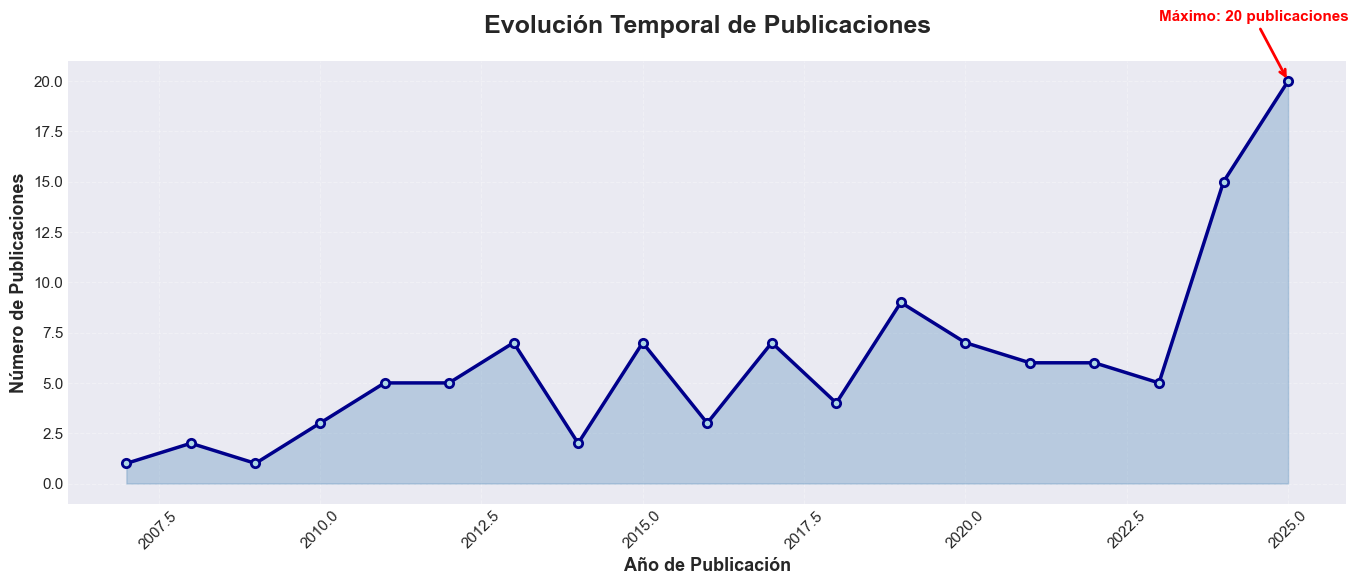

 Gráfico 1 generado: Evolución temporal de publicaciones
   Período: 2007 - 2025
   Total publicaciones: 115


In [427]:
# GRÁFICO 1: Evolución temporal de publicaciones
plt.figure(figsize=(14, 6))

# Preparar datos
pubs_por_año = df['publication_year'].value_counts().sort_index()

# Crear gráfico de línea y área
plt.fill_between(pubs_por_año.index, pubs_por_año.values, alpha=0.3, color='steelblue')
plt.plot(pubs_por_año.index, pubs_por_año.values, marker='o', linewidth=2.5, 
         markersize=6, color='darkblue', markerfacecolor='lightblue', markeredgewidth=2)

# Personalización
plt.title('Evolución Temporal de Publicaciones', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Año de Publicación', fontsize=13, fontweight='bold')
plt.ylabel('Número de Publicaciones', fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--')
plt.xticks(rotation=45)

# Añadir anotación para el año con más publicaciones
max_año = pubs_por_año.idxmax()
max_pubs = pubs_por_año.max()
plt.annotate(f'Máximo: {max_pubs} publicaciones', 
             xy=(max_año, max_pubs), 
             xytext=(max_año-2, max_pubs+max_pubs*0.15),
             arrowprops=dict(arrowstyle='->', color='red', lw=2),
             fontsize=11, fontweight='bold', color='red')

plt.tight_layout()
plt.show()

print(f" Gráfico 1 generado: Evolución temporal de publicaciones")
print(f"   Período: {pubs_por_año.index.min()} - {pubs_por_año.index.max()}")
print(f"   Total publicaciones: {pubs_por_año.sum():,}")

**Interpretación del gráfico:** Es un campo emergente; ganó relevancia significativa después del año 2022, posiblemente impulsado por eventos globales, nuevas políticas de financiamiento, o avances tecnológicos que facilitaron la investigación en esta área.
**Conclusión:** Tendencia muy positiva que sugiere un campo activo y en expansión.

### 4.2 Gráfico: Distribución de Citaciones

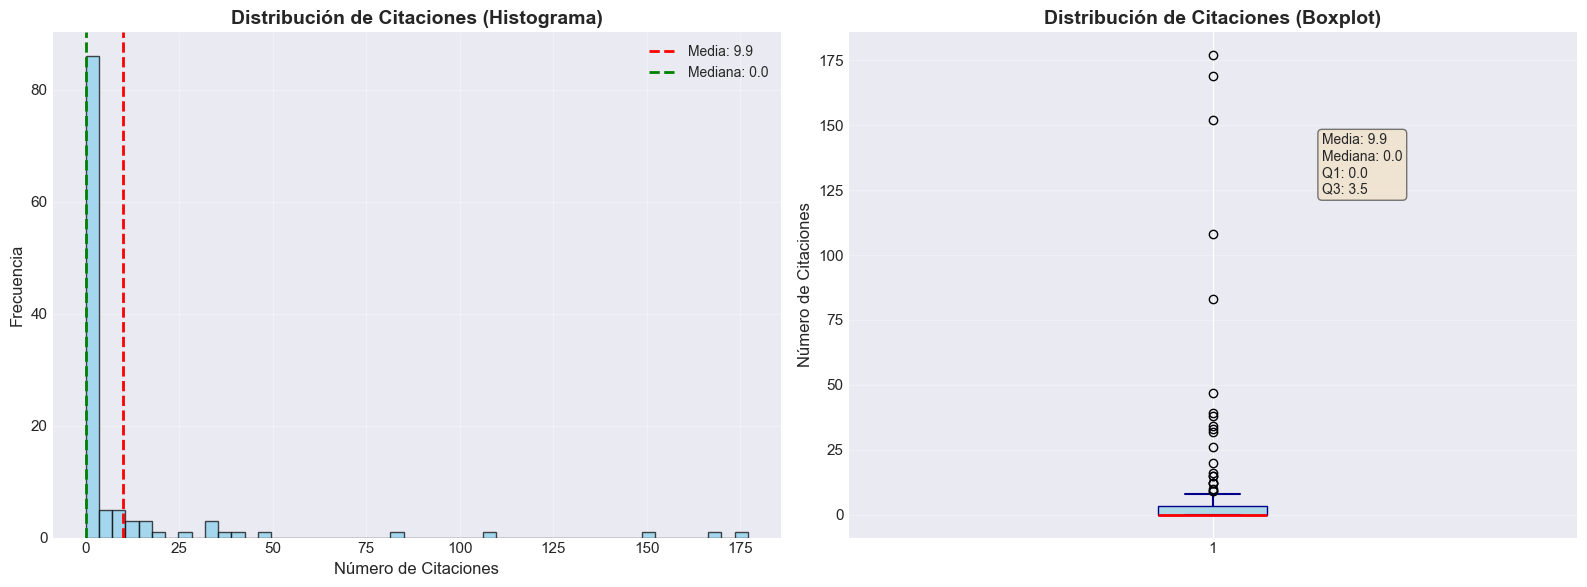

 Gráfico 2 generado: Distribución de citaciones
   Rango: 0 - 177 citaciones


In [428]:
# GRÁFICO 2: Distribución de citaciones
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Subplot 1: Histograma
axes[0].hist(df['cited_by_count'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].axvline(df['cited_by_count'].mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {df["cited_by_count"].mean():.1f}')
axes[0].axvline(df['cited_by_count'].median(), color='green', linestyle='--', linewidth=2, label=f'Mediana: {df["cited_by_count"].median():.1f}')
axes[0].set_title('Distribución de Citaciones (Histograma)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Número de Citaciones', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# Subplot 2: Boxplot
bp = axes[1].boxplot(df['cited_by_count'], vert=True, patch_artist=True,
                     boxprops=dict(facecolor='lightblue', color='darkblue'),
                     medianprops=dict(color='red', linewidth=2),
                     whiskerprops=dict(color='darkblue', linewidth=1.5),
                     capprops=dict(color='darkblue', linewidth=1.5))
axes[1].set_title('Distribución de Citaciones (Boxplot)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Número de Citaciones', fontsize=12)
axes[1].grid(True, alpha=0.3, axis='y')

# Añadir estadísticas al boxplot
stats_text = f"Media: {df['cited_by_count'].mean():.1f}\nMediana: {df['cited_by_count'].median():.1f}\nQ1: {df['cited_by_count'].quantile(0.25):.1f}\nQ3: {df['cited_by_count'].quantile(0.75):.1f}"
axes[1].text(1.15, df['cited_by_count'].max()*0.7, stats_text, fontsize=10, 
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print(f" Gráfico 2 generado: Distribución de citaciones")
print(f"   Rango: {df['cited_by_count'].min()} - {df['cited_by_count'].max()} citaciones")

**Interpretación de las gráficas:**
Corpus muy reciente: La alta proporción de papers sin citar podría sugerir publicaciones de 2024-2025 sin tiempo para acumular citas.0
Patrón normal en ciencia: Solo el 10-20% de papers logran impacto significativo
Papers valiosos: Los outliers (>25 citas) son las contribuciones realmente influyentes del corpus
**Conclusión:** Distribución típica de citaciones con dominio de papers de bajo/nulo impacto y unos pocos trabajos altamente citados que concentran la atención académica.

### 4.3 Gráfico: Acceso Abierto

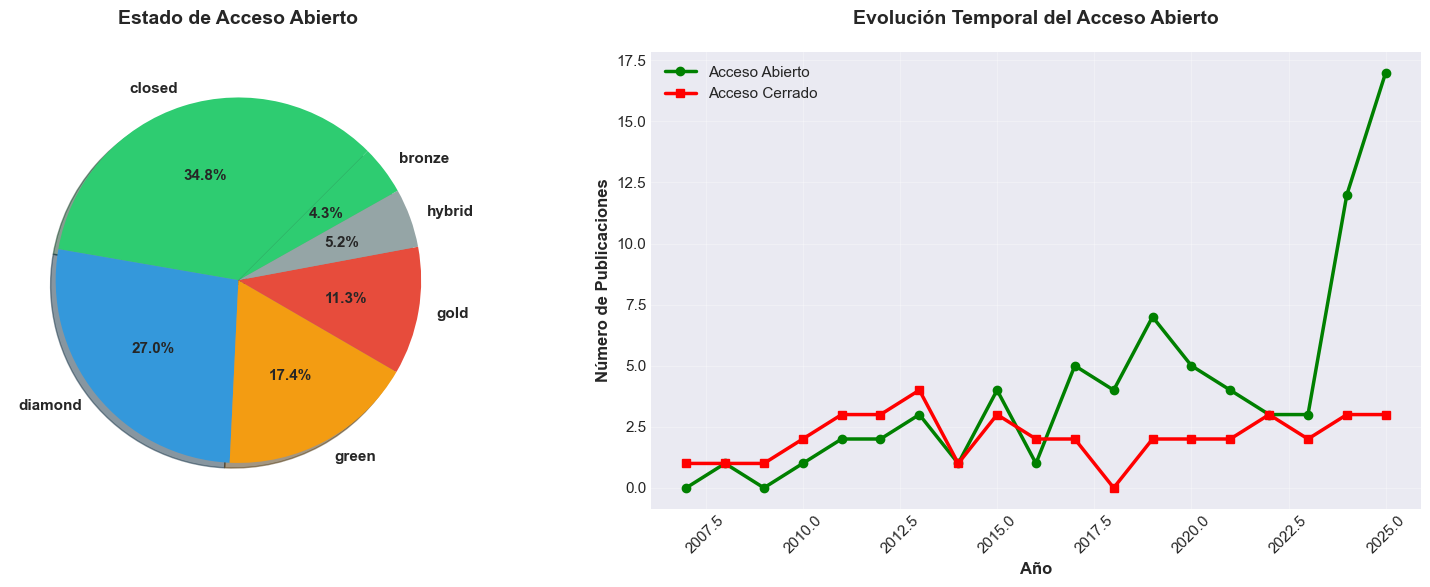

 Gráfico 3 generado: Análisis de acceso abierto


In [429]:
# GRÁFICO 5: Análisis de acceso abierto
if 'open_access.oa_status' in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Subplot 1: Estado de OA
    oa_status = df['open_access.oa_status'].value_counts()
    colors_oa = ['#2ecc71', '#3498db', '#f39c12', '#e74c3c', '#95a5a6']
    
    axes[0].pie(oa_status.values, labels=oa_status.index, autopct='%1.1f%%',
                colors=colors_oa[:len(oa_status)], shadow=True, startangle=45,
                textprops={'fontsize': 11, 'fontweight': 'bold'})
    axes[0].set_title('Estado de Acceso Abierto', fontsize=14, fontweight='bold', pad=20)
    
    # Subplot 2: Evolución temporal de OA
    if 'publication_year' in df.columns:
        oa_por_año = df.groupby(['publication_year', 'open_access.is_oa']).size().unstack(fill_value=0)
        
        if True in oa_por_año.columns and False in oa_por_año.columns:
            axes[1].plot(oa_por_año.index, oa_por_año[True], marker='o', linewidth=2.5,
                        label='Acceso Abierto', color='green', markersize=6)
            axes[1].plot(oa_por_año.index, oa_por_año[False], marker='s', linewidth=2.5,
                        label='Acceso Cerrado', color='red', markersize=6)
            axes[1].set_xlabel('Año', fontsize=12, fontweight='bold')
            axes[1].set_ylabel('Número de Publicaciones', fontsize=12, fontweight='bold')
            axes[1].set_title('Evolución Temporal del Acceso Abierto', fontsize=14, fontweight='bold', pad=20)
            axes[1].legend(fontsize=11)
            axes[1].grid(True, alpha=0.3)
            axes[1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    print(f" Gráfico 3 generado: Análisis de acceso abierto")

**Interpretación del gráfico:** 
Cambio cultural reciente: La explosión de publicaciones 2023-2025 es predominantemente en OA.

**Conclusión:** Corpus con excelente práctica de acceso abierto, especialmente en años recientes. La combinación de alto Diamond OA + tendencia creciente sugiere compromiso genuino con la ciencia abierta.

### 4.4 Gráfico: Relación Año-Citaciones

<Figure size 1400x700 with 0 Axes>

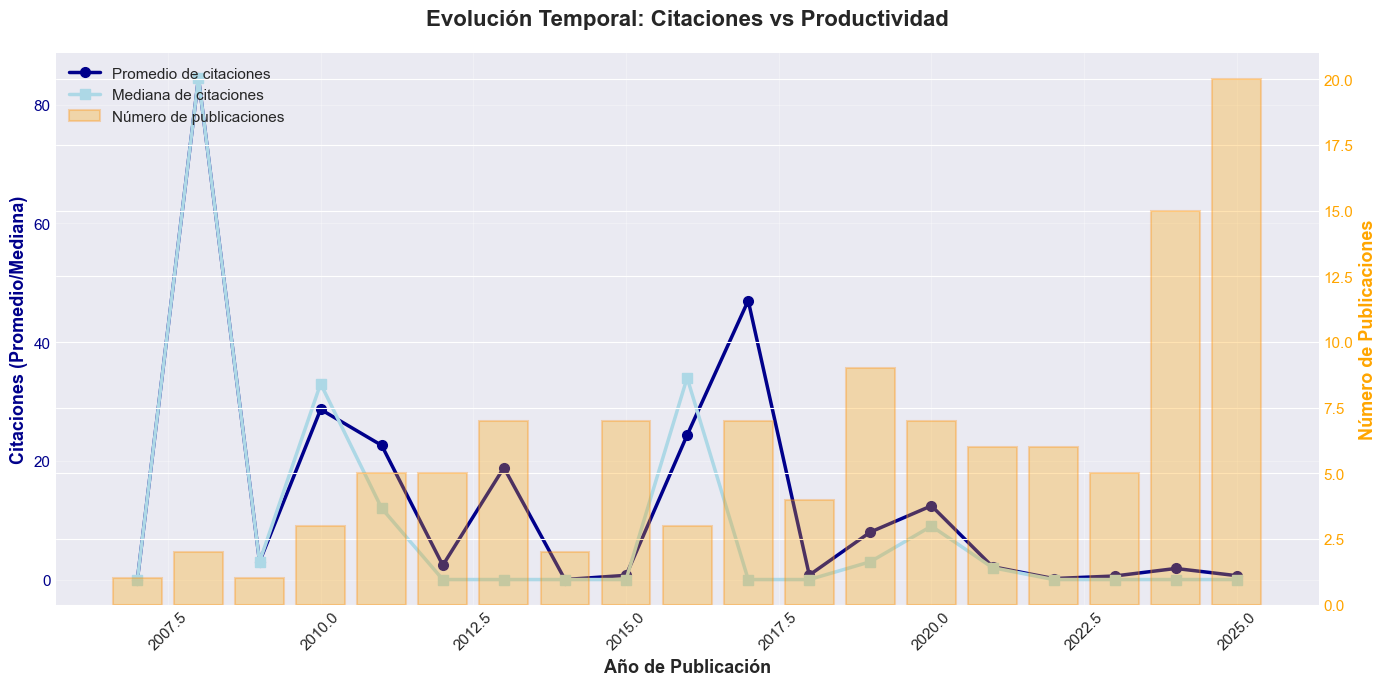

 Gráfico 4 generado: Relación año-citaciones
   Año con mayor promedio de citaciones: 2008 (84.5 citas)


In [430]:
# GRÁFICO 6: Relación entre año de publicación y citaciones
plt.figure(figsize=(14, 7))

# Calcular estadísticas por año
stats_por_año = df.groupby('publication_year')['cited_by_count'].agg(['mean', 'median', 'sum', 'count'])

# Crear gráfico con dos ejes Y
fig, ax1 = plt.subplots(figsize=(14, 7))

# Eje 1: Promedio y mediana de citaciones
ax1.plot(stats_por_año.index, stats_por_año['mean'], marker='o', linewidth=2.5,
         color='darkblue', label='Promedio de citaciones', markersize=7)
ax1.plot(stats_por_año.index, stats_por_año['median'], marker='s', linewidth=2.5,
         color='lightblue', label='Mediana de citaciones', markersize=7)
ax1.set_xlabel('Año de Publicación', fontsize=13, fontweight='bold')
ax1.set_ylabel('Citaciones (Promedio/Mediana)', fontsize=13, fontweight='bold', color='darkblue')
ax1.tick_params(axis='y', labelcolor='darkblue')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

# Eje 2: Número de publicaciones
ax2 = ax1.twinx()
ax2.bar(stats_por_año.index, stats_por_año['count'], alpha=0.3, color='orange', 
        label='Número de publicaciones', edgecolor='darkorange', linewidth=1.5)
ax2.set_ylabel('Número de Publicaciones', fontsize=13, fontweight='bold', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Título y leyendas
plt.title('Evolución Temporal: Citaciones vs Productividad', fontsize=16, fontweight='bold', pad=20)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=11)

plt.tight_layout()
plt.show()

print(f" Gráfico 4 generado: Relación año-citaciones")
print(f"   Año con mayor promedio de citaciones: {stats_por_año['mean'].idxmax()} ({stats_por_año['mean'].max():.1f} citas)")

**Interpretación del gráfico:**
Relación inversa: cuando aumenta productividad, disminuyen las citaciones./ Papers antiguos (2008-2016) tienen más citaciones acumuladas./ Papers recientes (2023-2025) tienen pocas o ninguna citación (esperado por su antigüedad).

**Nota:** La caída de citaciones en años recientes refleja que los papers nuevos no han tenido tiempo de ser citados, no necesariamente una pérdida de calidad.

### 4.5 Gráfico: Top Topics de Investigación

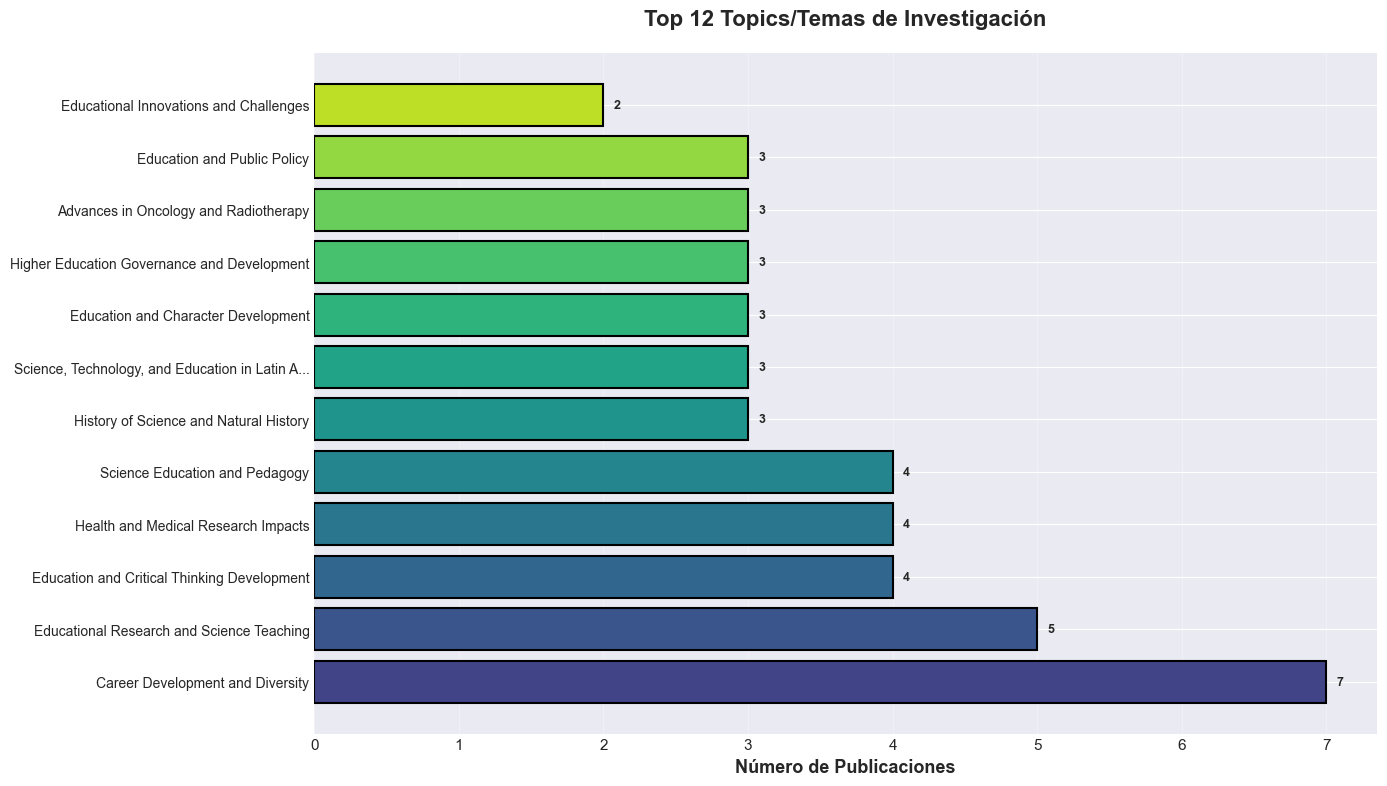

 Gráfico 5 generado: Top topics de investigación
   Topic más frecuente: Career Development and Diversity... (7 publicaciones)


In [431]:
# GRÁFICO 7: Top topics de investigación
if 'primary_topic.display_name' in df.columns:
    plt.figure(figsize=(14, 8))
    
    # Obtener top 12 topics
    top_topics = df['primary_topic.display_name'].value_counts().head(12)
    top_topics = top_topics[top_topics.index != 'No especificado']
    
    # Acortar nombres
    nombres_topics = [nombre[:45] + '...' if len(nombre) > 45 else nombre for nombre in top_topics.index]
    
    # Crear gráfico
    bars = plt.barh(range(len(top_topics)), top_topics.values, 
                    color=plt.cm.viridis(np.linspace(0.2, 0.9, len(top_topics))),
                    edgecolor='black', linewidth=1.5)
    
    plt.yticks(range(len(top_topics)), nombres_topics, fontsize=10)
    plt.xlabel('Número de Publicaciones', fontsize=13, fontweight='bold')
    plt.title('Top 12 Topics/Temas de Investigación', fontsize=16, fontweight='bold', pad=20)
    plt.grid(True, alpha=0.3, axis='x')
    
    # Añadir valores
    for i, valor in enumerate(top_topics.values):
        plt.text(valor + max(top_topics.values)*0.01, i, f'{valor}', 
                va='center', fontsize=9, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print(f" Gráfico 5 generado: Top topics de investigación")
    print(f"   Topic más frecuente: {top_topics.index[0][:60]}... ({top_topics.values[0]} publicaciones)")

**Interpretación del gráfico:** 

Tema dominante: Career Development and Diversity lidera con 7 publicaciones. 
Fuerte predominio de temas educativos: 10 de los 12 topics están relacionados con educación (pedagogía, enseñanza de ciencias, política educativa, desarrollo educativo, pensamiento crítico).

Otros temas presentes: Salud/medicina: Oncología, radioterapia, investigación médica, historia de la ciencia.

Múltiples subtemas dentro del área educativa. 
No hay un único topic que domine completamente el corpus.
La investigación se distribuye entre varios enfoques complementarios del campo educativo.

## 5. Conclusiones y Hallazgos Principales

Resumen de los principales hallazgos del análisis bibliométrico.

In [432]:
print("="*70)
print("RESUMEN EJECUTIVO DEL ANÁLISIS")
print("="*70)

print("\n ESTADÍSTICAS GENERALES:")
print("-"*70)
print(f"   • Total de publicaciones analizadas: {len(df):,}")
print(f"   • Período temporal: {df['publication_year'].min()} - {df['publication_year'].max()}")
print(f"   • Total de citaciones acumuladas: {df['cited_by_count'].sum():,}")
print(f"   • Promedio de citaciones por publicación: {df['cited_by_count'].mean():.2f}")

if 'open_access.is_oa' in df.columns:
    oa_pct = (df['open_access.is_oa'].sum() / len(df)) * 100
    print(f"   • Porcentaje de acceso abierto: {oa_pct:.1f}%")

print("\n PRINCIPALES HALLAZGOS:")
print("-"*70)

# 1. Tendencia temporal
pubs_año = df['publication_year'].value_counts().sort_index()
tendencia = "creciente" if pubs_año.iloc[-1] > pubs_año.iloc[0] else "decreciente"
print(f"   1. Tendencia temporal {tendencia} en el período analizado")

# 2. Año más productivo
año_max = pubs_año.idxmax()
print(f"   2. Año más productivo: {año_max} con {pubs_año.max()} publicaciones")

# 3. Distribución de citaciones
alto_impacto = (df['cited_by_count'] > df['cited_by_count'].quantile(0.75)).sum()
pct_alto = (alto_impacto / len(df)) * 100
print(f"   3. {pct_alto:.1f}% de las publicaciones tienen alto impacto (>Q3 citaciones)")

# 4. Diversidad de fuentes
if 'primary_location.source.display_name' in df.columns:
    n_fuentes = df['primary_location.source.display_name'].nunique()
    print(f"   4. Diversidad de fuentes: {n_fuentes} revistas/fuentes únicas")

print("\n" + "="*70)
print(" ANÁLISIS COMPLETADO EXITOSAMENTE")
print("="*70)

RESUMEN EJECUTIVO DEL ANÁLISIS

 ESTADÍSTICAS GENERALES:
----------------------------------------------------------------------
   • Total de publicaciones analizadas: 115
   • Período temporal: 2007 - 2025
   • Total de citaciones acumuladas: 1,142
   • Promedio de citaciones por publicación: 9.93
   • Porcentaje de acceso abierto: 65.2%

 PRINCIPALES HALLAZGOS:
----------------------------------------------------------------------
   1. Tendencia temporal creciente en el período analizado
   2. Año más productivo: 2025 con 20 publicaciones
   3. 25.2% de las publicaciones tienen alto impacto (>Q3 citaciones)
   4. Diversidad de fuentes: 96 revistas/fuentes únicas

 ANÁLISIS COMPLETADO EXITOSAMENTE


## 6. Exportar Datos Limpios

Gurdar el dataset limpio para futuros análisis.

In [433]:
# Guardar dataset limpio
df.to_csv('corpus_limpio.csv', index=False)
print(" Dataset limpio guardado como 'corpus_limpio.csv'")
print(f" Resumen del archivo guardado:")
print(f"   • Filas: {len(df):,}")
print(f"   • Columnas: {len(df.columns)}")
print(f"   • Tamaño: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

 Dataset limpio guardado como 'corpus_limpio.csv'
 Resumen del archivo guardado:
   • Filas: 115
   • Columnas: 27
   • Tamaño: 0.48 MB
